In [56]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022


# Loading international- matches dataset 

In [57]:
df = pd.read_csv('international_matches.csv')
df1 = pd.read_csv('players_22.csv')

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8976\1141665387.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('players_22.csv')


## Analyzing dataset types / counting 

In [58]:
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [59]:
countries = df.groupby('home_team')['date'].count()
countries

home_team
Afghanistan        36
Albania           131
Algeria           159
American Samoa     17
Andorra            97
                 ... 
Vietnam           120
Wales             129
Yemen              87
Zambia            180
Zimbabwe          135
Name: date, Length: 211, dtype: int64

In [60]:
df.home_team.value_counts()

Mexico                      316
USA                         314
Japan                       280
Saudi Arabia                272
Korea Republic              249
                           ... 
Timor-Leste                  16
Tonga                        15
Anguilla                     13
Cook Islands                 10
Turks and Caicos Islands      8
Name: home_team, Length: 211, dtype: int64

In [61]:
df.away_team.value_counts()

Zambia                      243
Costa Rica                  217
Paraguay                    216
Sweden                      206
Mexico                      201
                           ... 
Bahamas                      20
Turks and Caicos Islands     18
Montserrat                   18
American Samoa               14
Samoa                        14
Name: away_team, Length: 211, dtype: int64

# Filtering qualified countries 



* Only 31 teams qualified 
* Filtering for away and home team 

In [62]:
filtercountry = "Qatar" ,"Ecuador", "Senegal", "Netherlands" ,"England", "Iran" , "USA" , "Wales",  "Argentina" , "Saudi Arabia",  "Mexico", "Poland",  "France" ,"Australia", "Denmark" ,"Tunisia" , "Spain" , "Costa Rica",  "Germany", "Japan" , "Belgium",  "Canada",  "Morocco",  "Croatia",  "Brazil",  "Serbia",  "Switzerland",  "Cameroon",  "Portugal",  "Ghana",  "Uruguay", "Korea Republic"

In [63]:
df.loc[(df['home_team'] == 'Qatar' )] # test for checking each countries 

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
188,1994-01-25,Qatar,Finland,Asia,Europe,54,45,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,1994-01-27,Qatar,Finland,Asia,Europe,54,45,0,0,0,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,1994-09-10,Qatar,Oman,Asia,Asia,67,77,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,1994-09-16,Qatar,Yemen,Asia,Asia,71,109,0,0,2,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,1994-11-09,Qatar,Oman,Asia,Asia,60,65,0,0,4,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23338,2021-12-10,Qatar,United Arab Emirates,Asia,Asia,51,70,1431,1350,5,...,No,Win,NaN,70.0,NaN,NaN,NaN,63.0,64.3,67.0
23343,2021-12-15,Qatar,Algeria,Asia,Africa,51,32,1431,1508,1,...,No,Lose,NaN,78.0,NaN,NaN,NaN,78.0,81.0,78.0
23344,2021-12-18,Qatar,Egypt,Asia,Africa,51,45,1431,1449,0,...,Yes,Win,NaN,NaN,NaN,NaN,NaN,NaN,79.3,70.8
23550,2022-03-26,Qatar,Bulgaria,Asia,Europe,52,71,1437,1345,2,...,No,Win,NaN,66.0,NaN,NaN,NaN,67.2,64.3,64.5


## Concat 2 datasets created qualified teams


In [64]:
dfhome = df[df['home_team'].isin(filtercountry)]
dfaway = df[df['away_team'].isin(filtercountry)]
newdf = pd.concat((dfhome, dfaway))
newdf.drop_duplicates()
newdf.count()

date                             10930
home_team                        10930
away_team                        10930
home_team_continent              10930
away_team_continent              10930
home_team_fifa_rank              10930
away_team_fifa_rank              10930
home_team_total_fifa_points      10930
away_team_total_fifa_points      10930
home_team_score                  10930
away_team_score                  10930
tournament                       10930
city                             10930
country                          10930
neutral_location                 10930
shoot_out                        10930
home_team_result                 10930
home_team_goalkeeper_score        5648
away_team_goalkeeper_score        5531
home_team_mean_defense_score      5645
home_team_mean_offense_score      5805
home_team_mean_midfield_score     5755
away_team_mean_defense_score      5541
away_team_mean_offense_score      5709
away_team_mean_midfield_score     5650
dtype: int64

In [65]:
#newdf.groupby('home_team')['date'].count()
qa = newdf.loc[(df['home_team'] == 'Qatar' )]
qa.groupby(["tournament"])["date"].count()


tournament
AFC Asian Cup                    12
AFC Asian Cup qualification      16
Arab Cup                         11
Copa América                      2
FIFA World Cup qualification     55
Friendly                        137
Gold Cup                          2
Gulf Cup                         31
King's Cup                        3
WAFF Championship                 5
Name: date, dtype: int64

# Filtering important competitions 
* Get only FIFA and UEFA competitions

In [66]:
newdf.groupby('tournament')['date'].count() # Checking all the competitions played 

tournament
AFC Asian Cup                                  152
AFC Asian Cup qualification                     88
African Cup of Nations                         273
African Cup of Nations qualification           262
African Nations Championship                    58
African Nations Championship qualification      10
Amílcar Cabral Cup                              17
Arab Cup                                        35
CONCACAF Nations League                         29
CONCACAF Nations League qualification            3
CONMEBOL–UEFA Cup of Champions                   1
COSAFA Cup                                       8
Confederations Cup                             194
Copa América                                   286
Copa Confraternidad                              2
Cyprus International Tournament                  9
Dynasty Cup                                     14
EAFF Championship                               54
FIFA World Cup                                 581
FIFA World Cup quali

In [67]:
filtertournament = "AFC Asian Cup", "AFC Asian Cup qualification ", "African Cup of Nations", "Friendly", "African Cup of Nations qualification", "African Nations Championship", "African Nations Championship qualification","Copa América", "FIFA World Cup", "FIFA World Cup qualification", "UEFA Euro", "UEFA Euro qualification", "UEFA Nations League"
# Selecting only the main competitions 
newdf = newdf.query('tournament in @filtertournament')

In [68]:
newdf.groupby('shoot_out')['date'].count() # Does the match include a penaly or not 

shoot_out
No     9641
Yes     137
Name: date, dtype: int64

In [69]:
newdf.groupby('home_team')['home_team_result'].count().sort_values(ascending=False)

home_team
Mexico             342
USA                311
Germany            298
France             297
Brazil             294
                  ... 
Solomon Islands      1
Chinese Taipei       1
Chad                 1
Suriname             1
Djibouti             1
Name: home_team_result, Length: 187, dtype: int64

# Filling Nan values (a lot of process) 

*  Identify columns with Nan 
* '[home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']

In [70]:
newdf.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       4530
away_team_goalkeeper_score       4618
home_team_mean_defense_score     4539
home_team_mean_offense_score     4408
home_team_mean_midfield_score    4460
away_team_mean_defense_score     4605
away_team_mean_offense_score     4454
away_team_mean_midfield_score    4515
dtype: int64

## Filling columns by columns
* Filling Nan with the mean of the column and the country that it belongs to 
* Filling missing Nan in the Qatar team

In [71]:

newdf['home_team_goalkeeper_score'] = newdf['home_team_goalkeeper_score'].fillna(newdf.groupby('home_team')['home_team_goalkeeper_score'].transform('mean'))

newdf['away_team_goalkeeper_score'] = newdf['away_team_goalkeeper_score'].fillna(newdf.groupby('away_team')['away_team_goalkeeper_score'].transform('mean'))

newdf['home_team_mean_defense_score'] = newdf['home_team_mean_defense_score'].fillna(newdf.groupby('home_team')['home_team_mean_defense_score'].transform('mean'))

newdf['home_team_mean_offense_score'] = newdf['home_team_mean_offense_score'].fillna(newdf.groupby('home_team')['home_team_mean_offense_score'].transform('mean'))

newdf['home_team_mean_midfield_score'] = newdf['home_team_mean_midfield_score'].fillna(newdf.groupby('home_team')['home_team_mean_midfield_score'].transform('mean'))

newdf['away_team_mean_defense_score'] = newdf['away_team_mean_defense_score'].fillna(newdf.groupby('away_team')['away_team_mean_defense_score'].transform('mean'))

newdf['away_team_mean_offense_score'] = newdf['away_team_mean_offense_score'].fillna(newdf.groupby('away_team')['away_team_mean_offense_score'].transform('mean'))

newdf['away_team_mean_midfield_score'] = newdf['away_team_mean_midfield_score'].fillna(newdf.groupby('away_team')['away_team_mean_midfield_score'].transform('mean'))

newdf = newdf.fillna(73.93)

In [72]:
#fifa rank delta of home and away team (higher values indicate that home team is stronger than away team)
df['fifa_rank_delta'] = df['away_team_fifa_rank'] - df ['home_team_fifa_rank']

#offense home team vs defense away team (higher values indicate that home team offense is stronger than away team defense)
df['offense/defense_ratio'] = df['home_team_mean_offense_score'] / df['away_team_mean_defense_score']

In [73]:
"""qatar = newdf.loc[(newdf['home_team'] == 'Qatar' )]
qatar["home_team_goalkeeper_score"] = qatar['home_team_goalkeeper_score'].fillna(76.96)
qatar.away_team_goalkeeper_score = qatar.away_team_goalkeeper_score.fillna(69.63)
qatar.home_team_mean_defense_score = qatar.home_team_mean_defense_score.fillna(76.50)
qatar.home_team_mean_offense_score = qatar.home_team_mean_offense_score.fillna(77.81)
qatar.home_team_mean_midfield_score = qatar.home_team_mean_midfield_score.fillna(77.71)
qatar.away_team_mean_defense_score = qatar.away_team_mean_defense_score.fillna(70.71)
qatar.away_team_mean_offense_score  = qatar.away_team_mean_offense_score.fillna(70.70)
qatar.away_team_mean_midfield_score = qatar.away_team_mean_midfield_score.fillna(71.44)
"""

'qatar = newdf.loc[(newdf[\'home_team\'] == \'Qatar\' )]\nqatar["home_team_goalkeeper_score"] = qatar[\'home_team_goalkeeper_score\'].fillna(76.96)\nqatar.away_team_goalkeeper_score = qatar.away_team_goalkeeper_score.fillna(69.63)\nqatar.home_team_mean_defense_score = qatar.home_team_mean_defense_score.fillna(76.50)\nqatar.home_team_mean_offense_score = qatar.home_team_mean_offense_score.fillna(77.81)\nqatar.home_team_mean_midfield_score = qatar.home_team_mean_midfield_score.fillna(77.71)\nqatar.away_team_mean_defense_score = qatar.away_team_mean_defense_score.fillna(70.71)\nqatar.away_team_mean_offense_score  = qatar.away_team_mean_offense_score.fillna(70.70)\nqatar.away_team_mean_midfield_score = qatar.away_team_mean_midfield_score.fillna(71.44)\n'

In [74]:
#newdf.drop(newdf.loc[(newdf['home_team'] == 'Qatar' )], inplace=True, axis=1)
#newdf = newdf.drop((['home_team'] == 'Qatar' ), axis=1)

In [75]:
#newdf.drop(newdf.loc[(newdf['home_team'] == 'Qatar' ), axis=0])

# Converting string columns into numeric
* renaming dataset
* convert to datetime index
* Label encoding 

In [76]:
df = newdf
df.date = pd.to_datetime(df.date)
df['result'] = df.home_team_result 
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,71.275510,67.311111,70.599091,75.413265,75.042857,72.305714,74.660417,73.423810,Win
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,Win,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,Win
14,1993-08-15,Uruguay,Brazil,South America,South America,22,8,0,0,1,...,Draw,79.368421,86.371622,79.753509,83.721053,78.356140,86.077027,86.625000,85.312162,Draw
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,...,Win,80.500000,69.581395,82.644304,88.286709,84.138608,70.993878,76.436735,73.813636,Win


In [77]:
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                               object
city                                     object
country                                  object
neutral_location                           bool
shoot_out                                object
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

In [78]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,result
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,85.941860,79.248175,85.902907,86.538372,85.355233,76.813139,79.659854,77.708759,Draw
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,71.275510,67.311111,70.599091,75.413265,75.042857,72.305714,74.660417,73.423810,Win
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,Win,78.088710,71.726190,72.558065,74.718548,74.060484,68.810714,71.543210,72.527381,Win
14,1993-08-15,Uruguay,Brazil,South America,South America,22,8,0,0,1,...,Draw,79.368421,86.371622,79.753509,83.721053,78.356140,86.077027,86.625000,85.312162,Draw
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,...,Win,80.500000,69.581395,82.644304,88.286709,84.138608,70.993878,76.436735,73.813636,Win


# Encoding non numericals columns
* Using label encoder and a dictionary 

In [79]:
le = preprocessing.LabelEncoder()
df.tournament = le.fit_transform(df.tournament)
df.city = le.fit_transform(df.city)

df.shoot_out = le.fit_transform(df.shoot_out)
df['result'] =  df['result'].replace({'Win': 3, 'Lose': 0, 'Draw' : 2})
df.dtypes

date                             datetime64[ns]
home_team                                object
away_team                                object
home_team_continent                      object
away_team_continent                      object
home_team_fifa_rank                       int64
away_team_fifa_rank                       int64
home_team_total_fifa_points               int64
away_team_total_fifa_points               int64
home_team_score                           int64
away_team_score                           int64
tournament                                int32
city                                      int32
country                                  object
neutral_location                           bool
shoot_out                                 int32
home_team_result                         object
home_team_goalkeeper_score              float64
away_team_goalkeeper_score              float64
home_team_mean_defense_score            float64
home_team_mean_offense_score            

## Deleting useless columns

In [80]:
del df['home_team_result']
del df['home_team_continent']
del df['away_team_continent']
del df['country']

del df['city']


In [81]:
df.isnull().sum() # still many values missing / problem is that values missing belongs to qatar mostly / , 

date                             0
home_team                        0
away_team                        0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
neutral_location                 0
shoot_out                        0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
result                           0
dtype: int64

In [82]:
df.groupby('home_team')['tournament'].sum()

home_team
Afghanistan      14
Albania         246
Algeria         162
Andorra         166
Angola           94
               ... 
Vietnam          35
Wales          1390
Yemen             7
Zambia          115
Zimbabwe         51
Name: tournament, Length: 187, dtype: int32

In [83]:
one = (df.groupby('home_team')['result'].sum() /  df.groupby('home_team')['tournament'].sum())
one = pd.DataFrame(data=one).reset_index()

two = (df.groupby('away_team')['result'].sum() /  df.groupby('away_team')['tournament'].sum())
two = pd.DataFrame(data=two).reset_index()


In [84]:
'''result = dict(pd.concat([one,two]).groupby('home_team',as_index=False).sum().to_dict(orient='split')['data'])
print([result[v] for v in result if v in filtercountry])'''
countCollection = df['home_team'].value_counts()
countCollection

Mexico             342
USA                311
Germany            298
France             297
Brazil             294
                  ... 
Suriname             1
Belize               1
Dominica             1
Solomon Islands      1
Aruba                1
Name: home_team, Length: 187, dtype: int64

# Data Viz 
## Displaying points earned by winning matches of the qualified teams 

In [85]:
home_points = df.groupby('home_team')['result'].sum()
away_points = df.groupby('away_team')['result'].sum() 

display = (home_points.add(away_points, fill_value=0)
                .rename_axis('Team')
                .reset_index(name='Points')
                .sort_values('Points', ascending=False, ignore_index=True))
display = display[display['Team'].isin(filtercountry)]
display = display.sort_values(by ="Points", ascending=True)

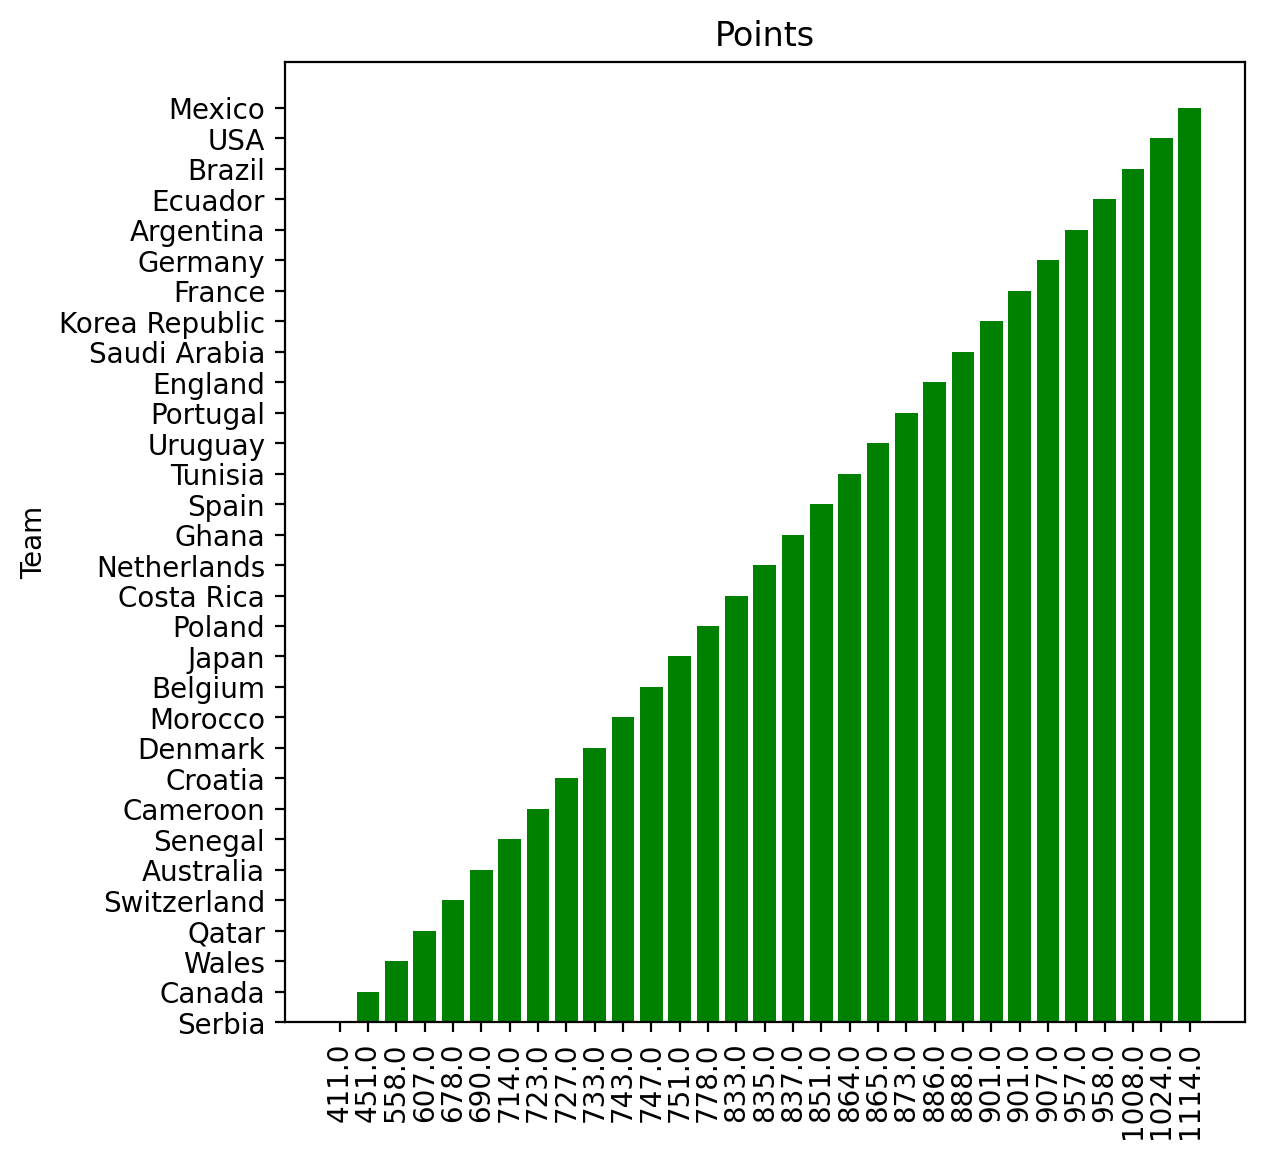

In [86]:
fig = plt.figure(figsize=(6,8), dpi=200)
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 

ax.bar(x=np.arange(len(display['Points'])), # The x coordinates of the bars. 
       height=display['Team'], # the height(s) of the vars 
       color="green", align="center",
       tick_label=display['Points'])

ax.set_ylabel('Team')
#ax.set_xticks(rotation='vertical')
ax.set_title('Points')
plt.xticks(rotation=90)
plt.show()

## Fifa Ranking 

In [87]:
rank = pd.read_csv('fifa_ranking-2022-08-25.csv')
rank1 = pd.read_csv('fifa_ranking-2022-08-25.csv')
rank.dtypes

rank                 int64
country_full        object
country_abrv        object
total_points       float64
previous_points    float64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [88]:
rank = rank.loc[(rank['rank_date'] == "2022-08-25")]
rank = rank[rank['country_full'].isin(filtercountry)]

<AxesSubplot:xlabel='rank', ylabel='country_full'>

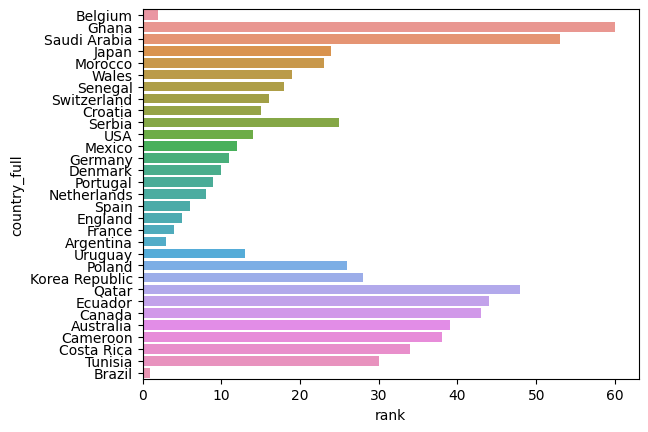

In [89]:

sns.barplot(data=rank, x="rank" , y="country_full")

## Strongest offense team 

In [90]:
#let's re-shape the data a bit
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

#select for each country the latest match
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(20, 'offense_score')

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8976\1700669849.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


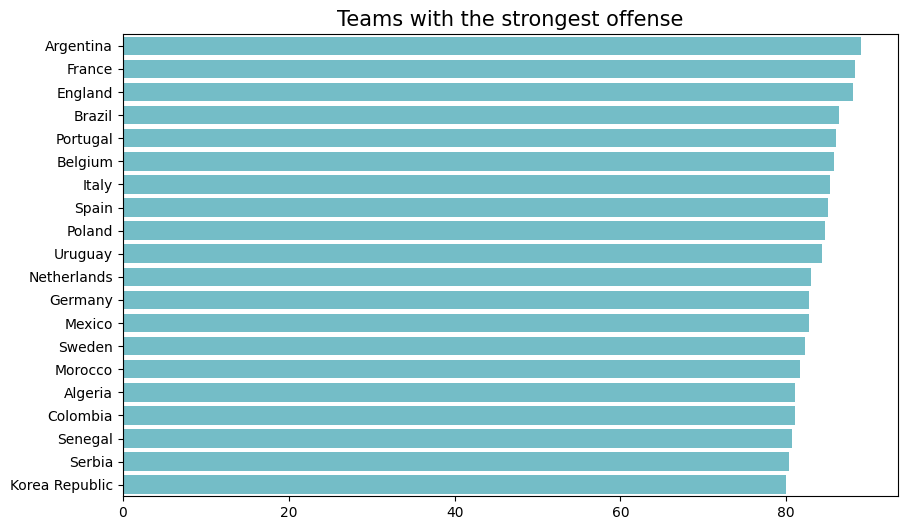

In [91]:
#plot the teams with the strongest offense players
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data = offense_top, y = 'team', x = 'offense_score', orientation = 'horizontal', color = "#66C8D5")
ax.set_title ('Teams with the strongest offense', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

In [92]:
#let's re-shape the data a bit
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away = fifa_rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
fifa_rank = home.append(away)

#select for each country the latest match
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(5, 'rank')

#let's see the 5 strongest teams
fifa_rank_top

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_8976\1616664776.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank
23760,2022-06-06,Brazil,1
23909,2022-06-14,Belgium,2
23885,2022-06-13,France,3
23741,2022-06-05,Argentina,4
23906,2022-06-14,England,5


## Is the match played at home as an influence on the result ? 

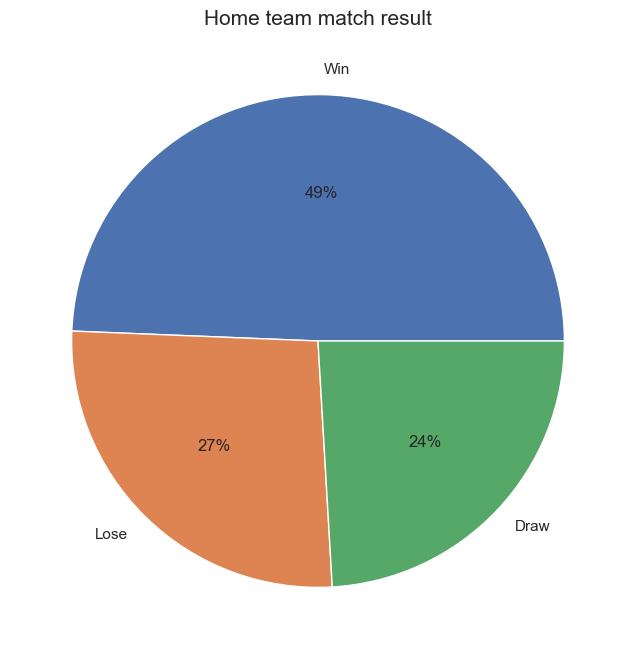

In [97]:
#select all matches played at non-neutral locations
home_team_advantage = df[df['neutral_location']==False]['result'].value_counts(normalize=True)

#plot
fig, axes = plt.subplots(1,1,  figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win',  'Lose', 'Draw'],  autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

## Winning rates of France

<AxesSubplot:xlabel='France_Results', ylabel='count'>

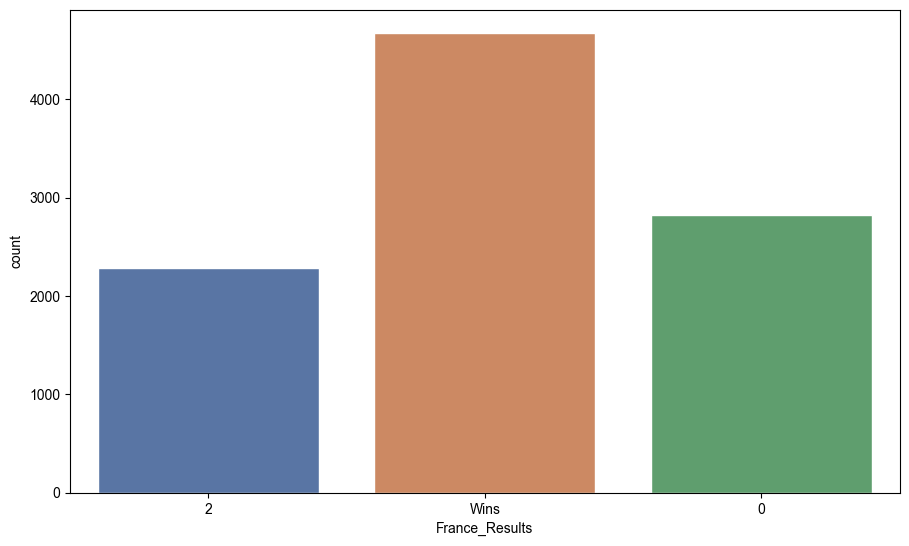

In [94]:
wins = []
for row in df['result']:
    if row != 2 and row != 0 :
        wins.append('Wins')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['France_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)

In [98]:
del df['neutral_location']

In [ ]:
qa = df[df.home_team == 'Qatar']
qa1= df[df.away_team == 'Qatar']

ec = df[df.home_team == 'Ecuador']
ec1 = df[df.away_team == 'Ecuador']

se = df[df.home_team == 'Senegal']
se1= df[df.away_team == 'Senegal']

ne = df[df.home_team == 'Netherlands']
ne1=df[df.away_team == 'Netherlands']

en = df[df.home_team == 'England']
en1= df[df.away_team == 'England']

ir= df[df.home_team == 'Iran']
ir1=df[df.away_team == 'Iran']

us= df[df.home_team == 'USA']
us1= df[df.away_team == 'USA']

wa= df[df.home_team == 'Wales']
wa1= df[df.away_team == 'Wales']

ar=df[df.home_team == 'Argentina']
ar1=df[df.away_team == 'Argentina']

sa=df[df.home_team == 'Saudia Arabia']
sa1=df[df.away_team == 'Saudia Arabia']

me=df[df.home_team == 'Mexico']
me1=df[df.away_team == 'Mexico']

po=df[df.home_team== 'Poland']
po1=df[df.away_team == 'Poland']

fr= df[df.home_team == 'France']
fr1= df[df.away_team == 'France']

au= df[df.home_team == 'Australia']
au1 =df[df.away_team == 'Australia']

de=df[df.home_team == 'Denmark']
de1= df[df.away_team == 'Denmark']

tu=df[df.home_team == 'Tunisia']
tu1= df[df.away_team == 'Tunisia'] 

sp=df[df.home_team == 'Spain']
sp1 = df[df.away_team == 'Spain']

co= df[df.home_team == 'Costa Rica']
co1 = df[df.away_team == 'Costa Rica']

ge= df[df.home_team == 'Germany']
ge1 = df[df.away_team == 'Germany']

ja=df[df.home_team == 'Japan']
ja1 = df[df.away_team == 'Japan']

be=df[df.home_team == 'Belgium']
be1=df[df.away_team == 'Belgium']

can= df[df.home_team == 'Canada']
can1=df[df.away_team == 'Canada']

mo= df[df.home_team == 'Morocco'] 
mo1 =df[df.away_team == 'Morocco']

cr= df[df.home_team == 'Croatia']
cr1=df[df.away_team == 'Croatia']

br= df[df.home_team == 'Brazil']
br1=df[df.away_team == 'Brazil']

se= df[df.home_team == 'Serbia']
se1= df[df.away_team == 'Serbia']

sw= df[df.home_team == 'Switzerland'] 
sw1=df[df.away_team == 'Switzerland']

ca=df[df.home_team == 'Cameroon']
ca1=df[df.away_team == 'Cameroon']

po= df[df.home_team == 'Portugal']
po1=df[df.away_team == 'Portugal']

gh= df[df.home_team == 'Ghana']
gh1=df[df.away_team == 'Ghana']

ur= df[df.home_team == 'Uruguay']
ur1=df[df.away_team == 'Uruguay']

ko= df[df.home_team == 'Korea Republic']
ko1=df[df.away_team == 'Korea Republic']

#a = np.array([[tree1,tree2,tree3,tree4,tree5]])

In [ ]:
dfqatar =pd.concat([qa, qa1])
dfec = pd.concat([ec, ec1])
dfse = pd.concat([se, se1])
dfne = pd.concat([ne, ne1])
dfen = pd.concat([en, en1])
dfir = pd.concat([ir, ir1])
dfus = pd.concat([us, us1])
dfwa = pd.concat([wa, wa1])
dfar = pd.concat([ar, ar1])
dfsa = pd.concat([sa, sa1])
dfme = pd.concat([me, me1])
dfpo = pd.concat([po, po1])
dffr = pd.concat([fr, fr1])
dfau =  pd.concat([au, au1])
dfde = pd.concat([de, de1])
dftu= pd.concat([tu, tu1])
dfsp = pd.concat([sp, sp1])
dfco = pd.concat([co, co1])
dfge = pd.concat([ge, ge1])
dfja = pd.concat([ja, ja1])
dfbe= pd.concat([be, be1])
dfcan = pd.concat([can, can1])
dfmo = pd.concat([mo, mo1])
dfcr= pd.concat([cr, cr1])
dfbr = pd.concat([br, br1])
dfse = pd.concat([se, se1])
dfsw= pd.concat([sw, sw1])
dfca = pd.concat([ca, ca1])
dfpo=pd.concat([po, po1])
dfgh=pd.concat([gh, gh1])
dfur=pd.concat([ur, ur1])
dfko=pd.concat([ko, ko1])

In [99]:
df.to_csv('df_clean.csv', encoding='utf-8', index=False)